In [18]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Analisis de los datos

Valores del dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Valores nulos dentro del dataset


,Característica,Valores Nulos
0,sepal length (cm),0
1,sepal width (cm),0
2,petal length (cm),0
3,petal width (cm),0


Valores estadisticos del dataset


,Característica,Promedio,Desviación Estándar,Valor Mínimo,Valor Máximo
0,sepal length (cm),5.843333,0.825301,4.3,7.9
1,sepal width (cm),3.057333,0.434411,2.0,4.4
2,petal length (cm),3.758000,1.759404,1.0,6.9
3,petal width (cm),1.199333,0.759693,0.1,2.5


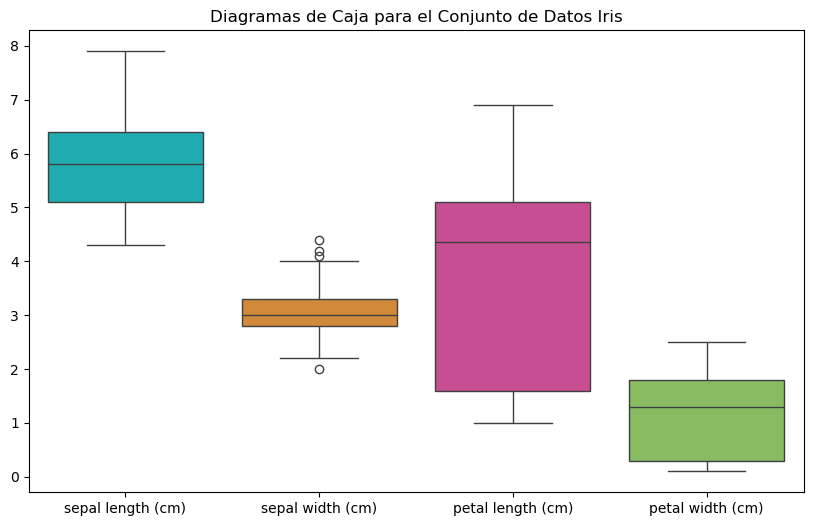

In [19]:
iris = load_iris()
X = iris.data

print("Valores del dataset")
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
display(iris_df.head())

print("Valores nulos dentro del dataset")
null_values_by_feature = iris_df.isnull().sum()
null_values_df = pd.DataFrame({'Característica': null_values_by_feature.index, 'Valores Nulos': null_values_by_feature.values})
display(null_values_df)

print("Valores estadisticos del dataset")
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)  
min_val = np.min(X, axis=0) 
max_val = np.max(X, axis=0)  
stats_df = pd.DataFrame({
    'Característica': iris.feature_names,
    'Promedio': mean,
    'Desviación Estándar': std_dev,
    'Valor Mínimo': min_val,
    'Valor Máximo': max_val
})
display(stats_df)

custom_palette = ["#08c2c9", "#e98b21", "#db3a94", "#87ca53"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient="v", palette=custom_palette)
plt.title("Diagramas de Caja para el Conjunto de Datos Iris")
plt.show()


PCA con función

In [22]:
from sklearn.decomposition import PCA

Valores estandarizados del dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Cálculo de la covarianza:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


,Explained Variance Ratio,Cumulative Variance Ratio
Componente 1,0.729624,0.729624
Componente 2,0.228508,0.958132
Componente 3,0.036689,0.994821
Componente 4,0.005179,1.000000


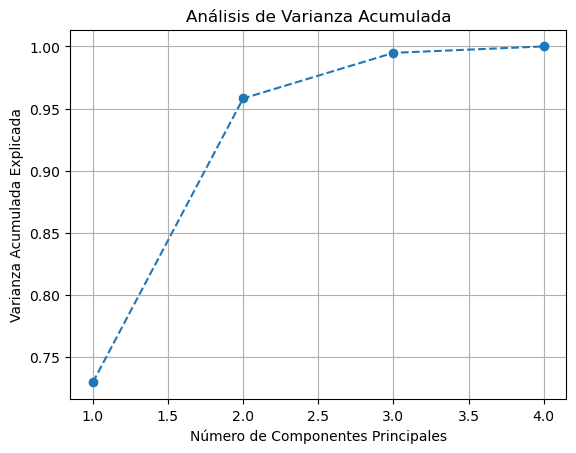

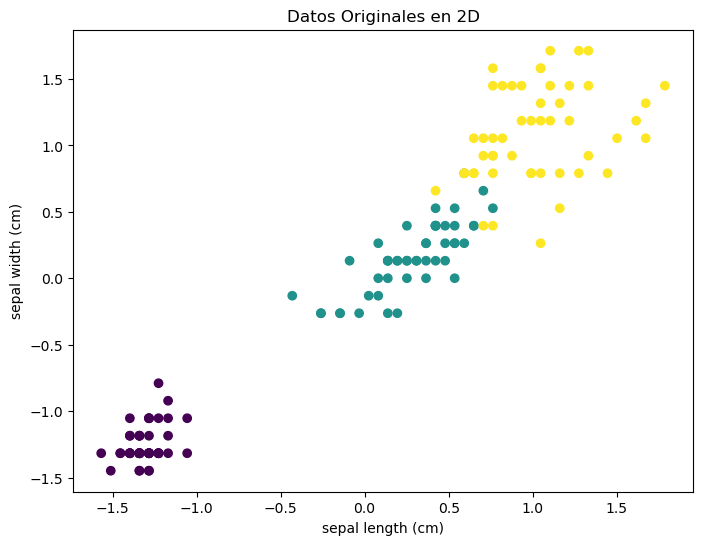

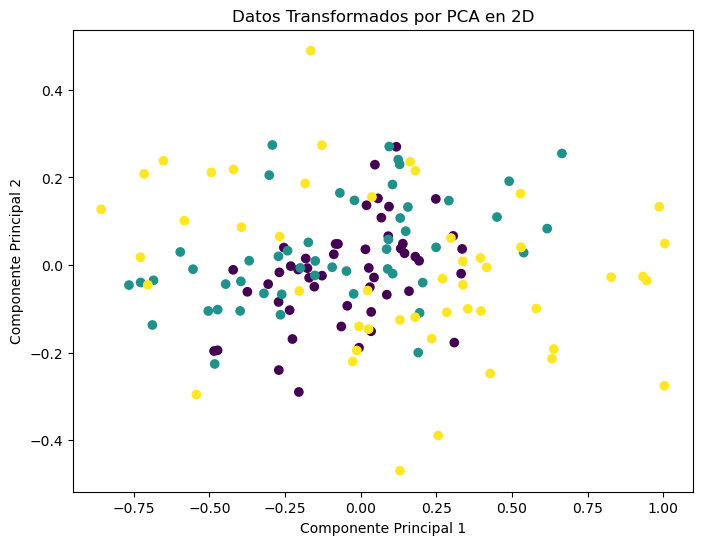

In [44]:
print("Valores estandarizados del dataset")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
display(X_scaled_df.head())

print("Cálculo de la covarianza:")
cov_matrix = np.cov(X_scaled, rowvar=False)
iris_covmat = pd.DataFrame(data=cov_matrix, columns=iris.feature_names, index=iris.feature_names)
display(iris_covmat)

n_components = 4
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

variance_df = pd.DataFrame({
    'Explained Variance Ratio': explained_variance_ratio[:n_components],
    'Cumulative Variance Ratio': cumulative_variance_ratio[:n_components]
}, index=[f'Componente {i}' for i in range(1, n_components + 1)])

display(variance_df)
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Análisis de Varianza Acumulada')
plt.grid()
plt.show()


X_original_2d = X_scaled[:, 2:]
plt.figure(figsize=(8, 6))
plt.scatter(X_original_2d[:, 0], X_original_2d[:, 1], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Datos Originales en 2D')
plt.show()

X_pca_2d = X_pca[:, 2:]
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos Transformados por PCA en 2D')
plt.show()


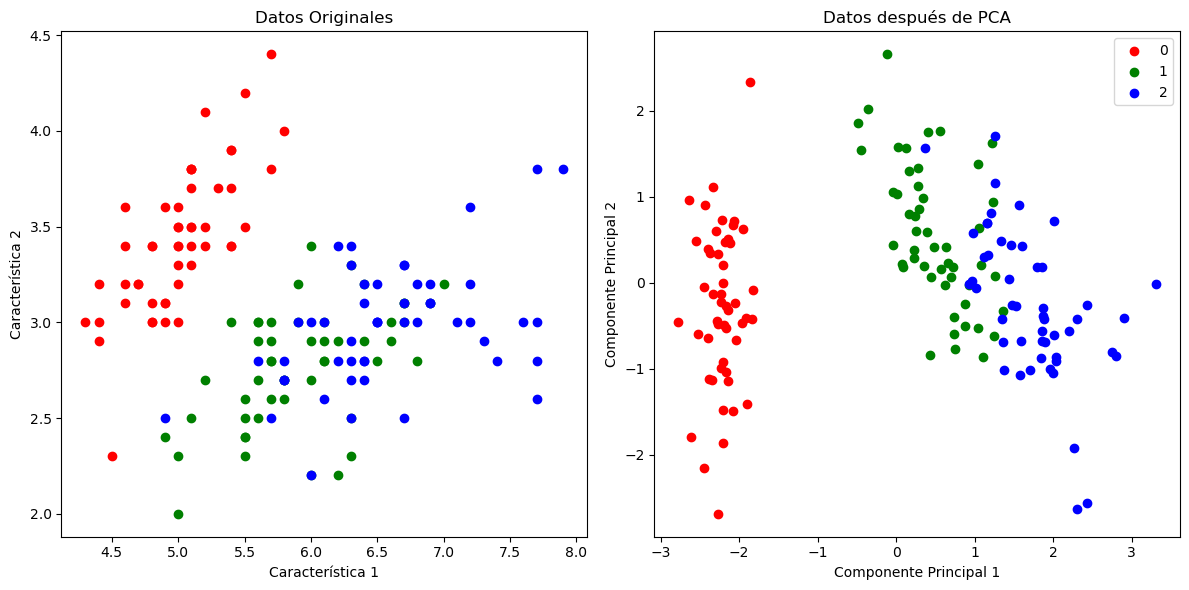

In [45]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Estandarizar los datos (opcional pero recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos originales en un gráfico de dispersión en 2D
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos Originales')

# Aplicar PCA
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
num_components = 2
top_eigenvectors = eigenvectors[:, :num_components]
X_pca = X_scaled.dot(top_eigenvectors)

# Visualizar los datos después de aplicar PCA en un gráfico de dispersión en 2D
plt.subplot(1, 2, 2)
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos después de PCA')

plt.legend()
plt.tight_layout()
plt.show()